# **Analisis Predictivo de la Edad del Cangrejo 🦀**

# **Importamos Librerias**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Carga de Datos**

In [2]:
data = pd.read_csv("D:/DataSets/CrabAge/data_CrabAge.csv")
data.drop(columns = "Unnamed: 0", inplace = True)
data.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,F,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9
1,M,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6
2,I,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6
3,F,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10
4,I,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6


> - Age (Edad): Edad del cangrejo (en meses)

> - Sex (Sexo): Sexo del cangrejo; Femenino (F), masculino (M) o indeterminado (I).

> - length (largo): Largo del cangrejo (en pies; 1 pie = 30.48 cm).

> - Diameter (Diametro): Diametro del cangrejo (en pies; 1 pie = 30.48 cm).

> - Height (Altura): Altura del cangrejo (en pies; 1 pie = 30.48 cm).

> - Weight (Peso): Peso del cangrejo (en onzas; 1 libra = 16 onzas).

> - Shucked Weight (Peso Descascarado): Peso del cangrejo sin cascarón (en onzas; 1 libra = 16 onzas).

> - Viscera Weight (Peso de las Visceras): Peso de las visceras del cangrejo (en onzas; 1 libra = 16 onzas).

> - Shell Weight (Peso de la Concha): Peso del cascarón del cangrejo (en onzas; 1 libra = 16 onzas).

# **Análisis Exploratorio**


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3893 entries, 0 to 3892
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             3893 non-null   object 
 1   Length          3893 non-null   float64
 2   Diameter        3893 non-null   float64
 3   Height          3893 non-null   float64
 4   Weight          3893 non-null   float64
 5   Shucked Weight  3893 non-null   float64
 6   Viscera Weight  3893 non-null   float64
 7   Shell Weight    3893 non-null   float64
 8   Age             3893 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 273.9+ KB


Cantidad de Registros y Tipos de Variables:

> Tenemos `3893` registros, en cada una de las `9` variables obtenidas.

> Todas las variables son tipo númerico en particular `Float`, excepto Sex que es de tipo `categórico`.

> En particular, la variable númerica `Age` es discreta, excepto las otras variables númericas que son continuas.

In [4]:
data.describe()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
count,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000
mean,1.311306,1.020893,0.349374,23.567275,10.207342,5.136546,6.795844,9.954791
std,0.300431,0.248233,0.104976,13.891201,6.275275,3.104133,3.943392,3.220967
min,0.187500,0.137500,0.000000,0.056699,0.028349,0.014175,0.042524,1.000000
25%,1.125000,0.875000,0.287500,12.672227,5.343881,2.664853,3.713785,8.000000
50%,1.362500,1.062500,0.362500,22.792998,9.539607,4.861939,6.662133,10.000000
75%,1.537500,1.200000,0.412500,32.786197,14.273973,7.200773,9.355335,11.000000
max,2.037500,1.625000,2.825000,80.101512,42.184056,21.545620,28.491248,29.000000


> Note que el dataset no tiene `valores faltantes`, cada columna tiene `3893` registros completos.

In [5]:
# Para mostrar más detalle del dataset, no es necesario
sum_nan = data.isnull().sum()
print(sum_nan)

Sex               0
Length            0
Diameter          0
Height            0
Weight            0
Shucked Weight    0
Viscera Weight    0
Shell Weight      0
Age               0
dtype: int64


In [6]:
data[data["Height"] == 0]

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
269,I,0.7875,0.575,0.0,3.798833,1.630096,0.807961,9.936500,6
3867,I,1.0750,0.850,0.0,12.133586,5.854172,2.438057,3.260193,8


> Note que la columna `Height` su valor minimo es cero, lo cual no tiene sentido en nuestros datos.

# Imputación de datos 

In [7]:
data.iloc[269, 3] = 0.180317
data.iloc[3867, 3] = 0.170518

In [8]:
data[data["Height"] == 0]

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age


In [9]:
sum_duplicados = data.duplicated().sum()
print(sum_duplicados)

0


> No tenemos registros `duplicados`

# **Estadísticas Descriptivas**



<function matplotlib.pyplot.show(close=None, block=None)>

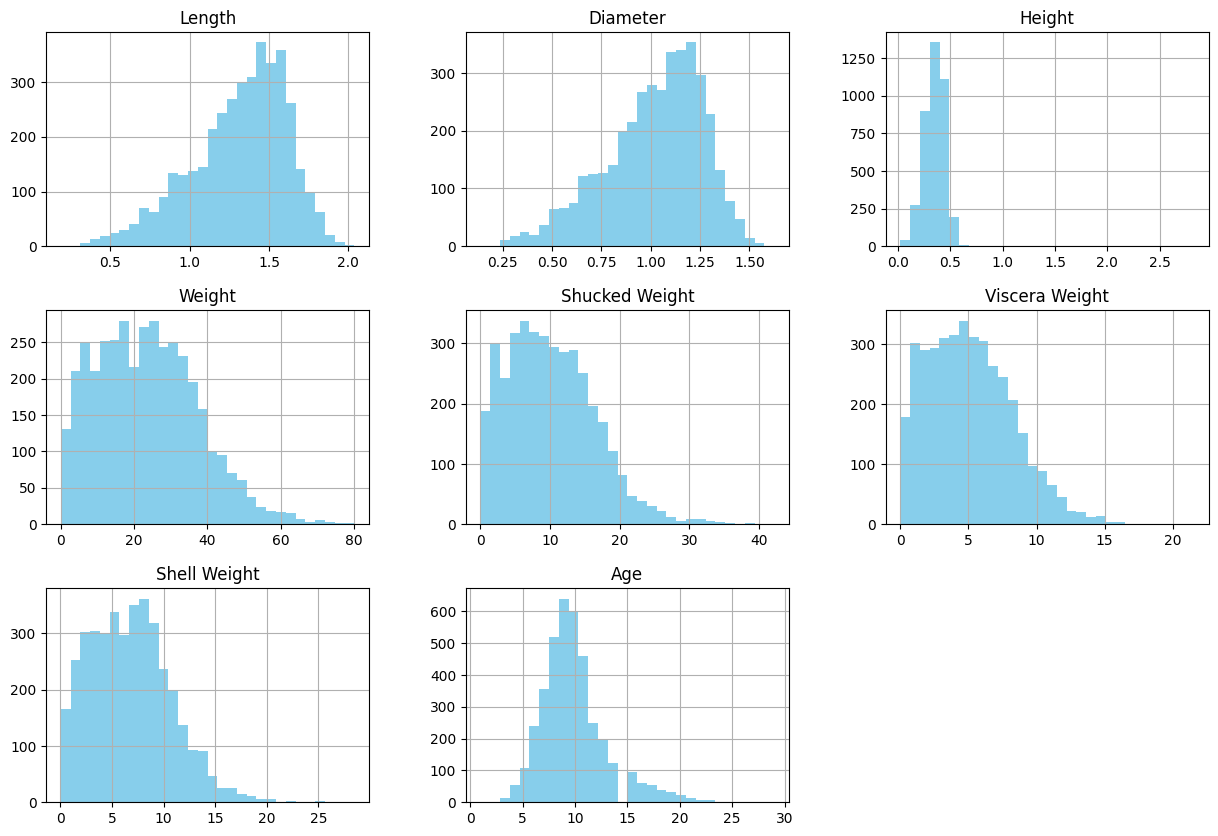

In [10]:
data.hist(bins = 30, color = "Skyblue",  figsize=(15, 10))
plt.show

# Variables categóricas

> Solo tenemos una variable categórica que corresponde a `Sex`

In [11]:
data.describe(include = object)

,Sex
count,3893
unique,3
top,M
freq,1435


Mostremos las diferentes cantidades de cada tipo de sexo en cangrejos

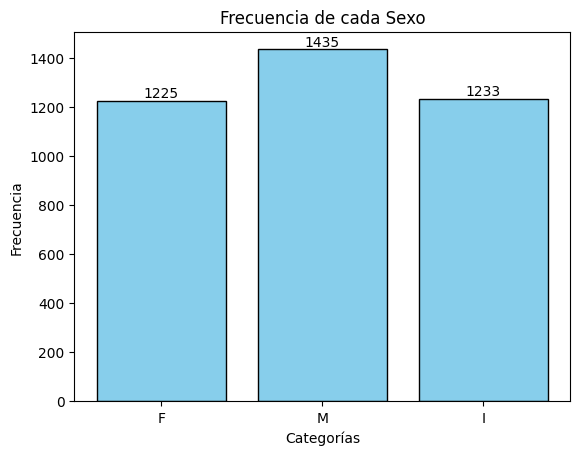

In [12]:
from collections import Counter # para que nos obtenga las distintas catergorias y el número total de cada una


counts = Counter(data["Sex"]) # Nos devuelve un diccionario
categories  = list(counts.keys())
frequencies = list(counts.values())

plt.bar(categories, frequencies, color = "Skyblue", edgecolor = "black")

for i, freq in enumerate(frequencies):
    plt.text(i, freq + 0.2, str(freq), ha = "center", va = "bottom")


plt.title("Frecuencia de cada Sexo")
plt.xlabel("Categorías")
plt.ylabel("Frecuencia")

plt.show()


> Notemos que hay más cangrejos de sexo masculino.

> En cambio en femenino e indeterminado tenemos aproxidamente la misma proporción.

# Análisis y Tratamiento de Valores Atípicos

In [13]:
import plotly.express as px

In [14]:
fig = px.box(data["Age"], y = "Age", width= 600, height= 600)
fig.show()

> Necesitamos quitar o recortar los valores atipicos o extremos, ya que es un pre-requesito para aplicar una regresión lineal.


In [15]:
# Calculos
Q1 = np.percentile(data["Age"], 25)
Q3 = np.percentile(data["Age"], 75)
IQR = Q3 - Q1

# Limites
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Identificar valores extremos
outliers_age = [x for x in data.Age if x < lower_limit or x > upper_limit]
#print("Valores extremos:", outliers_age)

print("Tenemos", len(outliers_age), "valores extremos.")

Tenemos 257 valores extremos.


In [16]:
filtered_age = [x for x in data["Age"] if lower_limit <= x and x <= upper_limit]
print(len(filtered_age))

3636


In [17]:
df_clear = data.iloc[filtered_age]
df_clear.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
9,I,0.9125,0.6875,0.3375,6.803880,3.061746,1.261553,2.083688,7
6,F,1.3000,1.0000,0.3250,17.704263,6.095142,5.854172,4.819415,15
6,F,1.3000,1.0000,0.3250,17.704263,6.095142,5.854172,4.819415,15
10,M,0.8250,0.5375,0.1875,3.246018,1.275727,0.751262,0.992232,6
6,F,1.3000,1.0000,0.3250,17.704263,6.095142,5.854172,4.819415,15


In [20]:
# Tenemos que reiniciar los index de df_clear
df_clear.reset_index(drop = True, inplace = True)
df_clear.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,I,0.9125,0.6875,0.3375,6.803880,3.061746,1.261553,2.083688,7
1,F,1.3000,1.0000,0.3250,17.704263,6.095142,5.854172,4.819415,15
2,F,1.3000,1.0000,0.3250,17.704263,6.095142,5.854172,4.819415,15
3,M,0.8250,0.5375,0.1875,3.246018,1.275727,0.751262,0.992232,6
4,F,1.3000,1.0000,0.3250,17.704263,6.095142,5.854172,4.819415,15


# Correlaciones

<Axes: >

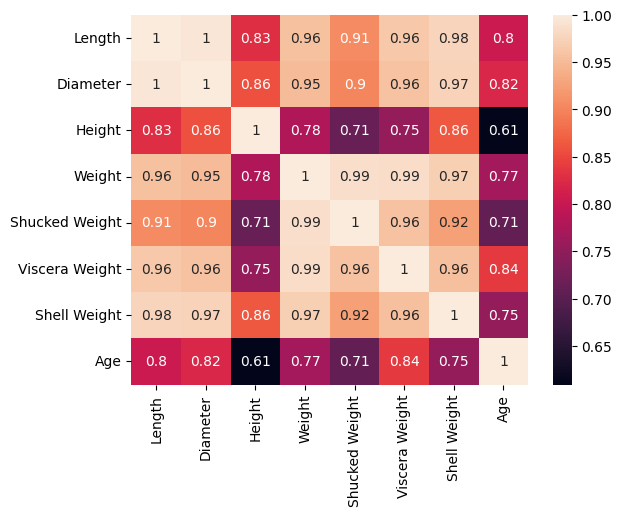

In [21]:
df_clear_copy = df_clear.drop(columns=["Sex"])
sns.heatmap(df_clear_copy.corr(method="pearson"), annot = True ) # por defecto el metodo de corr() es pearson

Note que las variables que tienen más correlación con nuestra variable objetivo `Age` son:

        • Viscera Weight
        • Diameter
        • Lenght
        • Weight
        • Shell Weight
        • Shucked Weight

Note que hay variables que tienen una correlación muy alta respecto a las otras variables, por ejemplo algunas son:

        • length
        • Diameter

Al que estas varibles tenga una correlación tan cercana o igual a `1` (una correlación positiva), nos indica que entre más aumente una variable la otra tambien va a crecer ya que tienen una correlación alta. Ejemplo, entre más diametro tenga va a ser más largo el cangrejo.




In [22]:
# Guardamos el dataset limpio
df_clear.to_csv("D:/DataSets/CrabAge/data_clear.csv")
df_clear.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,I,0.9125,0.6875,0.3375,6.803880,3.061746,1.261553,2.083688,7
1,F,1.3000,1.0000,0.3250,17.704263,6.095142,5.854172,4.819415,15
2,F,1.3000,1.0000,0.3250,17.704263,6.095142,5.854172,4.819415,15
3,M,0.8250,0.5375,0.1875,3.246018,1.275727,0.751262,0.992232,6
4,F,1.3000,1.0000,0.3250,17.704263,6.095142,5.854172,4.819415,15
